1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
https://github.com/achiyechezkel/machine-learning.git

In [1]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

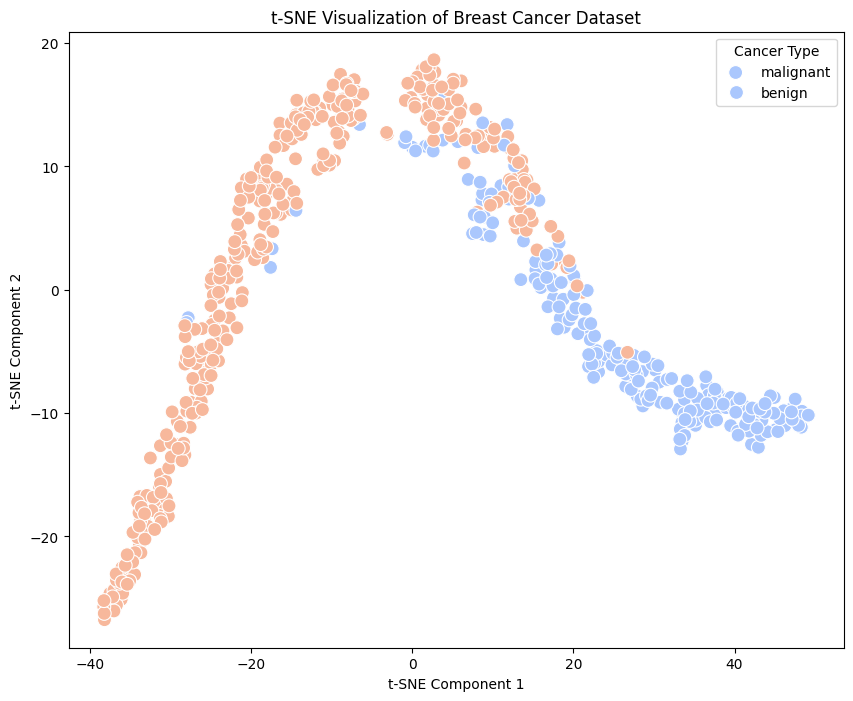

In [2]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_data = load_breast_cancer()
X = my_data.data
y = my_data.target

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['target'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='target', palette='coolwarm', s=100)
plt.title('t-SNE Visualization of Breast Cancer Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cancer Type', labels=my_data.target_names)
plt.show()

3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [3]:
from sklearn.model_selection import train_test_split

X = my_data.data
y = my_data.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (455, 30)
Test data shape: (114, 30)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_decision_tree = DecisionTreeClassifier(random_state=42)

model_decision_tree.fit(X_train, Y_train)

Y_pred = model_decision_tree.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of DecisionTreeClassifier: {accuracy * 100:.2f}%")


Accuracy of DecisionTreeClassifier: 94.74%


5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [5]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

model_random_forest.fit(X_train, Y_train)

Y_pred = model_random_forest.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of RandomForestClassifier: {accuracy * 100:.2f}%")


Accuracy of RandomForestClassifier: 96.49%


6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [6]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(random_state=42)

model_adaboost.fit(X_train, Y_train)

Y_pred = model_adaboost.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of AdaBoostClassifier: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoostClassifier: 97.37%


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

models = {
    "Decision Tree": model_decision_tree,
    "Random Forest": model_random_forest,
    "AdaBoost": model_adaboost
}

results = {}

for model_name, model in models.items():
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("\n")

best_model_name = max(results, key=lambda model: results[model]["F1 Score"])
best_model = models[best_model_name]

print(f"The best model based on F1 Score is: {best_model_name}")


Evaluation for Decision Tree:
Accuracy: 94.74%
Precision: 95.77%
Recall: 95.77%
F1 Score: 95.77%
Confusion Matrix:
[[40  3]
 [ 3 68]]


Evaluation for Random Forest:
Accuracy: 96.49%
Precision: 95.89%
Recall: 98.59%
F1 Score: 97.22%
Confusion Matrix:
[[40  3]
 [ 1 70]]


Evaluation for AdaBoost:
Accuracy: 97.37%
Precision: 97.22%
Recall: 98.59%
F1 Score: 97.90%
Confusion Matrix:
[[41  2]
 [ 1 70]]


The best model based on F1 Score is: AdaBoost


In [8]:
import random
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from itertools import product

decision_tree_params = {
    'max_depth': [5, 10, None, 20, 30],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 4, 10, 20]
}

random_forest_params = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20, 50],
    'max_features': ['sqrt', 'log2', None]
}

adaboost_params = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5]
}

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

def run_experiment(model_name, model, params, X_train, Y_train, X_test, Y_test):
    results = []
    used_combinations = set()
    param_keys = list(params.keys())
    param_values = list(params.values())

    while len(used_combinations) < 5:
        current_param = tuple(random.choice(param_values[i]) for i in range(len(param_values)))
        if current_param not in used_combinations:
            used_combinations.add(current_param)
            param_dict = dict(zip(param_keys, current_param))
            model.set_params(**param_dict)
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)

            accuracy = accuracy_score(Y_test, Y_pred)
            precision = precision_score(Y_test, Y_pred)
            recall = recall_score(Y_test, Y_pred)
            f1 = f1_score(Y_test, Y_pred)

            results.append({
                "Model": model_name,
                "Parameters": param_dict,
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "F1 Score": f1
            })

    return results

from sklearn.datasets import load_breast_cancer
my_data = load_breast_cancer()

X = my_data.data
Y = my_data.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

experiment_results = []

decision_tree_results = run_experiment("Decision Tree", models["Decision Tree"], decision_tree_params, X_train, Y_train, X_test, Y_test)
experiment_results.extend(decision_tree_results)

random_forest_results = run_experiment("Random Forest", models["Random Forest"], random_forest_params, X_train, Y_train, X_test, Y_test)
experiment_results.extend(random_forest_results)

adaboost_results = run_experiment("AdaBoost", models["AdaBoost"], adaboost_params, X_train, Y_train, X_test, Y_test)
experiment_results.extend(adaboost_results)

results_df = pd.DataFrame(experiment_results)

results_df = results_df.round({"Accuracy": 4, "Precision": 4, "Recall": 4, "F1 Score": 4})

results_df


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

,Model,Parameters,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,"{'max_depth': 30, 'min_samples_split': 50, 'mi...",0.9211,0.9189,0.9577,0.9379
1,Decision Tree,"{'max_depth': 20, 'min_samples_split': 5, 'min...",0.9561,0.9583,0.9718,0.9650
2,Decision Tree,"{'max_depth': 20, 'min_samples_split': 2, 'min...",0.9474,0.9452,0.9718,0.9583
3,Decision Tree,"{'max_depth': 5, 'min_samples_split': 10, 'min...",0.9474,0.9577,0.9577,0.9577
4,Decision Tree,"{'max_depth': 20, 'min_samples_split': 50, 'mi...",0.9211,0.9189,0.9577,0.9379
5,Random Forest,"{'n_estimators': 200, 'max_depth': 20, 'min_sa...",0.9561,0.9583,0.9718,0.9650
6,Random Forest,"{'n_estimators': 300, 'max_depth': 20, 'min_sa...",0.9649,0.9589,0.9859,0.9722
7,Random Forest,"{'n_estimators': 300, 'max_depth': 40, 'min_sa...",0.9649,0.9589,0.9859,0.9722
8,Random Forest,"{'n_estimators': 300, 'max_depth': None, 'min_...",0.9649,0.9589,0.9859,0.9722
9,Random Forest,"{'n_estimators': 200, 'max_depth': 30, 'min_sa...",0.9649,0.9589,0.9859,0.9722


In [9]:
best_results = results_df.loc[results_df.groupby("Model")["F1 Score"].idxmax()]

best_results.reset_index(drop=True, inplace=True)

best_results


,Model,Parameters,Accuracy,Precision,Recall,F1 Score
0,AdaBoost,"{'n_estimators': 300, 'learning_rate': 1.0}",0.9737,0.9722,0.9859,0.9790
1,Decision Tree,"{'max_depth': 20, 'min_samples_split': 5, 'min...",0.9561,0.9583,0.9718,0.9650
2,Random Forest,"{'n_estimators': 300, 'max_depth': 20, 'min_sa...",0.9649,0.9589,0.9859,0.9722


In [10]:
best_result = results_df.loc[results_df["F1 Score"].idxmax()]

best_result


,10
Model,AdaBoost
Parameters,"{'n_estimators': 300, 'learning_rate': 1.0}"
Accuracy,0.9737
Precision,0.9722
Recall,0.9859
F1 Score,0.979
